In [327]:
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

ner = spacy.load('en_core_web_sm')


import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from wordcloud import STOPWORDS, WordCloud

rcParams['figure.figsize'] = 15, 7

import re
import unicodedata
from string import punctuation

import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from wordcloud import STOPWORDS, WordCloud
from sklearn.tree import DecisionTreeClassifier
import threading

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, auc, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import spacy
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scipy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from numpy import mean
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.model_selection import StratifiedKFold



In [165]:
# methods for preprocessing
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence, stop_words):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_URL(text):
    return re.sub(r'http\S+', '', text)
    #sample_text = 'this is link for https://lms.simplilearn.com/courses/3817/PG-DS---Natural-Language-Processing/assessment simplilearn....another link https://www.google.com/'
    #remove_URL(sample_text)

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def remove_linebreaks(text):
    return text.replace('\n', ' ').replace('\r', ' ')

def remove_IP(text):
    # declaring the regex pattern for IP addresses
    # text_after = re.sub(regex_search_term, regex_replacement, text_before)
    return re.sub(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', '', text)
    #sample_ip = '123.268.2.1 test1 256.122.12.122'
    #remove_IP(sample_ip)


def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# def pre_process1( text):
#     """
#     """
#     text = remove_accented_chars(text)
#     text = expand_contractions(text, contractions_dict)
#     text = remove_punct(text)
#     text = autospell(text)
#     text = to_lower(text)
#     text = remove_stopwords(text)
#     text = remove_numbers(text)
#     #text = lemmatize(text)
#     text = stemming(text)
#     text = word_tokenize(text)
#     return ' '.join(text)


# def pre_process2(text):
#         lower_text = to_lower(text)
#         sentence_tokens = sentence_tokenize(lower_text)
#         word_list = []
#         for each_sent in sentence_tokens:
#             lemmatizzed_sent = lemmatize(each_sent)
#             clean_text = remove_numbers(lemmatizzed_sent)
#             clean_text = remove_punct(clean_text)
#             clean_text = remove_Tags(clean_text)
#             clean_text = remove_stopwords(clean_text)
#             word_tokens = word_tokenize(clean_text)
#             for i in word_tokens:
#                 word_list.append(i)
#         return word_list

# def pre_processing3(document):
#   #1. Remove Punctuations
#   sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
#   #2. Extract words out of the sentences
#   words = sentWithoutPunct.split()
#   #3. Normalize the data (lowercase)
#   wordNormalized = [word.lower() for word in words]
#   # 4. Remove Stopwords
#   vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
#   # 5. Apply Stemming
#   # a. Exclude those words with NER prop 
#   ner_words = [tokens.text for tokens in ner(document).ents]
#   # b. perform Stemming with other words
#   stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

#   return stemmed

# def preprocess_4(text):
#     text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
#     text = re.sub(r'@', '', text)
#     text = re.sub(r'#', '', text)
#     text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
#     text = re.sub("'s", "", text)
    
#     text = remove_linebreaks(text)
#     text = remove_accented_chars(text)
#     text = expand_contractions(text, contractions_dict)
#     text = remove_punct(text)
#     text = to_lower(text)
#     text = remove_stopwords(text)
#     text = remove_numbers(text)
#     #text = lemmatize(text)
#     text = stemming(text)
#     text = word_tokenize(text)
    
#     return ' '.join(text)

def preprocess_Wiki(text, stop_words):
    text = remove_IP(text)
    text = remove_URL(text)
    
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    # text = re.sub(r'@', '', text)
    # text = re.sub(r'#', '', text)
    # text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    # text = re.sub("'s", "", text)
    
    text = remove_linebreaks(text)
    #text = remove_accented_chars(text)
    #text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = to_lower(text)
    text = remove_stopwords(text, stop_words=stop_words)
    text = remove_numbers(text)
    #text = lemmatize(text)
    #text = stemming(text)
    text = word_tokenize(text)
    
    return ' '.join(text)

def preprocesscustom_stpwords(text, stop_words):
    text = remove_stopwords(text, stop_words=stop_words)
    text = word_tokenize(text)
    return ' '.join(text)


***
### Remove from stopwords words like no , not.. which may be prerequiite to toxicity
***

In [88]:
str(stop_words)

'{\'doesn\', \'again\', \'all\', \'from\', \'why\', \'now\', \'and\', \'very\', \'he\', "it\'s", "hasn\'t", \'me\', \'too\', \'weren\', "you\'d", \'needn\', \'during\', \'both\', \'theirs\', \'through\', \'it\', \'don\', \'when\', \'those\', \'an\', \'yourself\', \'the\', \'under\', \'these\', "wasn\'t", \'we\', \'they\', \'having\', \'by\', \'is\', \'some\', \'haven\', \'where\', \'been\', \'s\', \'won\', \'its\', \'yourselves\', \'was\', \'who\', \'him\', \'up\', \'them\', \'for\', \'ll\', \'am\', \'but\', \'or\', \'aren\', \'so\', \'then\', \'should\', \'with\', \'shouldn\', \'while\', "mustn\'t", \'ain\', \'this\', \'ours\', "won\'t", "you\'ll", \'hasn\', \'re\', \'are\', \'there\', \'have\', \'themselves\', \'i\', "didn\'t", \'whom\', \'above\', "that\'ll", \'didn\', \'isn\', \'be\', "wouldn\'t", "haven\'t", \'their\', \'on\', \'such\', \'after\', \'mustn\', \'what\', \'herself\', \'were\', \'until\', \'nor\', \'which\', "shouldn\'t", \'ourselves\', \'d\', "doesn\'t", \'shan\', \'

In [89]:
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('don')
stop_words.remove('won')
stop_words.remove('nor')
stop_words.remove('were')
stop_words.remove('haven')

In [90]:
wiki = pd.read_csv('content/train.csv')
wiki

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0
...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0


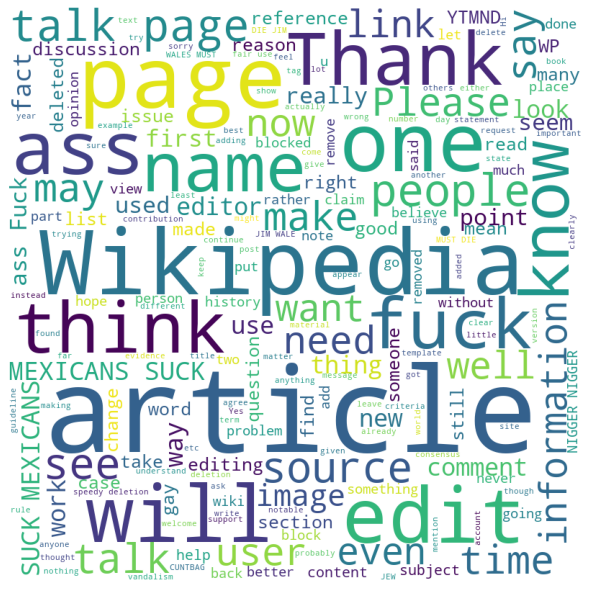

In [91]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(wiki['comment_text']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [92]:
wiki.isna().sum()

id              0
comment_text    0
toxic           0
dtype: int64

***
### no Nan's detected
***

In [93]:
wiki.toxic.value_counts()

0    4563
1     437
Name: toxic, dtype: int64

***
### Data lable is highly imbalanced...we shall use a basic method of stratification while building model
### Preprocessing text
>### Using regular expressions, remove IP addresses
>### Using regular expressions, remove URLs
>### Normalize the casing
>### Tokenize using word_tokenize from NLTK
>### Remove stop words
>### Remove punctuation
***

In [151]:
wiki['preprocess_wiki'] = wiki['comment_text'].apply(preprocess_Wiki, args=(stop_words,))
wiki['preprocess_wiki']

0       barnstar defender wiki barnstar like edit kaya...
1       seems unbalanced whatever said mathsci said fa...
2       marya dzmitruk born minsk belarus march mother...
3                                  talkback dear celestia
4       new categories honestly think need add categor...
                              ...                        
4995    dildo read response correctly never said going...
4996                          calm calm dont get big dick
4997    opinion dougweller using privileges poorly per...
4998     style section expanded didnt remember placed tag
4999    one agreement repulican joe hazelton wack mole...
Name: preprocess_wiki, Length: 5000, dtype: object

***
### Using a counter, find the top terms in the data. 
### Can any of these be considered contextual stop words? 
### Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
### If yes, drop these from the data
***

In [152]:
cv = CountVectorizer()
vec = cv.fit(wiki['preprocess_wiki'])
bow = cv.transform(wiki['preprocess_wiki'])
sum_of_words = bow.sum(axis=0)
words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [153]:
custom_stopwords = []
nlp = spacy.load('en_core_web_sm')

In [154]:
def get_nlp_results(text):
    doc = nlp(text)
    entity = doc.ents[0].label_ if len(doc.ents) > 0 else np.NaN
    #return (token[0].pos_, entity)
    for token in doc:
        return pd.Series([entity, token.lemma_, token.pos_, token.tag_, token.dep_,
                token.shape_, token.is_alpha, token.is_stop])

In [155]:
df_most_freq_words = pd.DataFrame(words_freq, columns=['word', 'freq'])
df1 = pd.DataFrame(df_most_freq_words['word'].apply(get_nlp_results))
df1.columns = ['entity', 'token.lemma_', 'token.pos_', 'token.tag_', 'token.dep_',
                'token.shape_', 'token.is_alpha', 'token.is_stop']
df2 = pd.concat([df_most_freq_words, df1], axis=1)
df2

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
0,article,1660,NaN,article,NOUN,NN,ROOT,xxxx,True,False
1,page,1508,NaN,page,NOUN,NN,ROOT,xxxx,True,False
2,wikipedia,1132,ORG,wikipedia,PROPN,NNP,ROOT,xxxx,True,False
3,talk,1063,NaN,talk,VERB,VB,ROOT,xxxx,True,False
4,please,1039,NaN,please,INTJ,UH,ROOT,xxxx,True,True
...,...,...,...,...,...,...,...,...,...,...
23473,opinio,1,NaN,opinio,PROPN,NNP,ROOT,xxxx,True,False
23474,priveleges,1,NaN,privelege,NOUN,NNS,ROOT,xxxx,True,False
23475,repulican,1,GPE,repulican,ADJ,JJ,ROOT,xxxx,True,False
23476,hazelton,1,ORG,hazelton,PROPN,NNP,ROOT,xxxx,True,False


***
### Remove Cardinal values(one., two, million, thousand...)
***

In [156]:
spacy.explain('CARDINAL')

'Numerals that do not fall under another type'

In [157]:
df2[df2['entity'] == 'CARDINAL'].head(20)

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
6,one,857,CARDINAL,one,NUM,CD,ROOT,xxx,True,True
74,two,242,CARDINAL,two,NUM,CD,ROOT,xxx,True,True
317,three,93,CARDINAL,three,NUM,CD,ROOT,xxxx,True,True
388,four,75,CARDINAL,four,NUM,CD,ROOT,xxxx,True,True
507,five,59,CARDINAL,five,NUM,CD,ROOT,xxxx,True,True
995,half,29,CARDINAL,half,NOUN,NN,ROOT,xxxx,True,False
1186,thousands,24,CARDINAL,thousand,NOUN,NNS,ROOT,xxxx,True,False
1273,six,22,CARDINAL,six,NUM,CD,ROOT,xxx,True,True
1579,feb,17,CARDINAL,feb,PROPN,NNP,ROOT,xxx,True,False
1586,zero,17,CARDINAL,zero,NUM,CD,ROOT,xxxx,True,False


In [158]:
custom_stopwords.extend(df2[df2['entity'] == 'CARDINAL']['word'].to_list())
# df2 = df2.drop(df2[df2['entity'] == 'CARDINAL'].index.values)
# df2[df2['entity'] == 'CARDINAL'].head(20) # confirm deletioin

***
### Remove ORGanizatioins which are proper nouns
***

In [159]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [160]:
df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')]

,word,freq,entity,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
2,wikipedia,1132,ORG,wikipedia,PROPN,NNP,ROOT,xxxx,True,False
870,house,33,ORG,house,PROPN,NNP,ROOT,xxxx,True,False
1053,muslim,27,ORG,muslim,PROPN,NNP,ROOT,xxxx,True,False
1156,islam,25,ORG,islam,PROPN,NNP,ROOT,xxxx,True,False
1166,gayvn,25,ORG,gayvn,PROPN,NNP,ROOT,xxxx,True,False
...,...,...,...,...,...,...,...,...,...,...
23344,mls,1,ORG,mls,PROPN,NNP,ROOT,xxx,True,False
23356,corbett,1,ORG,corbett,PROPN,NNP,ROOT,xxxx,True,False
23442,magazineand,1,ORG,magazineand,PROPN,NNP,ROOT,xxxx,True,False
23466,hominen,1,ORG,hominen,PROPN,NNP,ROOT,xxxx,True,False


In [161]:
custom_stopwords.extend(df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')]['word'].values)
# df2 = df2.drop(df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')].index.values)
# df2[(df2['entity'] == 'ORG') & (df2['token.pos_'] == 'PROPN')] # confirm deletioin

In [162]:
# remove duplicates
custom_stopwords = list(set(custom_stopwords))

***
### REmove custom stop words from preprocessed column
***

In [166]:
wiki['preprocess_wiki_custom'] = wiki['preprocess_wiki'].apply(preprocesscustom_stpwords, args=(custom_stopwords,))
wiki


,id,comment_text,toxic,preprocess_wiki,preprocess_wiki_custom
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender wiki barnstar like edit kaya...,barnstar defender wiki barnstar like edit kaya...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new categories honestly think need add categor...
...,...,...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0,dildo read response correctly never said going...,dildo read response correctly never said going...
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1,calm calm dont get big dick,calm calm dont get big dick
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0,opinion dougweller using privileges poorly per...,opinion dougweller using privileges poorly per...
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0,style section expanded didnt remember placed tag,style section expanded didnt remember placed tag


***
### ML
***

In [309]:
features = wiki['preprocess_wiki_custom']
labels = wiki['toxic']

In [310]:
X_train, X_test, y_train, y_test= train_test_split(features, labels.values, test_size=0.3, random_state=42, stratify=labels)

In [311]:
tfidfvect = TfidfVectorizer(max_features=4000)
tfidfvect = tfidfvect.fit(X_train, y_train)
tfidfObject_train = tfidfvect.transform(X_train)
tfidfObject_test = tfidfvect.transform(X_test)

***
### Model building: Support Vector Machine
>### Instantiate SVC from sklearn with a linear kernel
>### Fit on the train data
>### Make predictions for the train and the test set
***

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       1.00      0.77      0.87       306

    accuracy                           0.98      3500
   macro avg       0.99      0.89      0.93      3500
weighted avg       0.98      0.98      0.98      3500



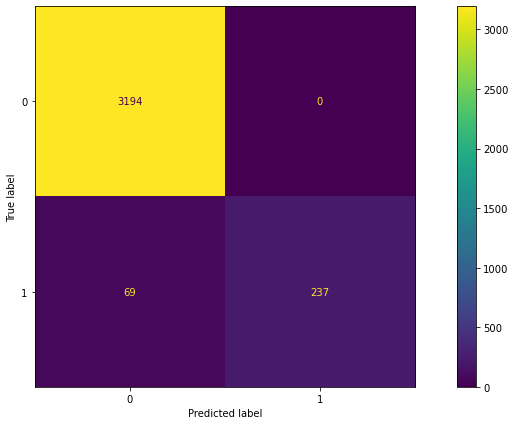

In [336]:
rfclf = SVC(random_state=42)
rfclf.fit(tfidfObject_train, y_train)

y_pred_train = rfclf.predict(tfidfObject_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay(confusion_matrix= cm_train).plot()

***
The data is highly imbalanced and is completely biased with majority of non-toxic.

Report the accuracy on the train set
>We have accuracy of 98.05%. Quality of model looks good in predicting overall.
>However due to huge imbalance in data, this score is largely contributed by TN(majority of non-toxic).
>Such model can perform poorly on a majority toxic biased data.

Report the recall(True Positive Rate/ sensitivity) on the train set:decent, high, low?
>100% on non-toxic meaning model is able to completely capture non-toxic without any misclassification
>78%(238 samples) correcly classified toxic, model misclassified 33% (68 samples) as non-toxic(FN)
>The Cost Sensitivity of misclassification can be considered high, in that, 68 samples of minority class were classified as majority (False Negative)
>Since we are interested in rarer event's(toxicity on wiki), we focus on improving on this aspect

Get the f1_score on the train set
>99% on non-toxic so we have a good balance between precision and recall
>88% on toxic...we track this in our next steps where we improve on recall which tend to reduce precision in turn reducing F1-score
  
***

***
### Model with class weights
***

In [344]:
class_weight = pd.Series(labels.value_counts()/labels.value_counts().sum()*100).to_dict()
rfclf = SVC(kernel='linear', C=500, class_weight={0: 0.1, 1: 0.9}, random_state=42)
rfclf.fit(tfidfObject_train, y_train)

# result train
y_pred_train = rfclf.predict(tfidfObject_train)
print('TRAIN RESULTS -> \n', classification_report(y_train, y_pred_train))

# result test
y_pred_test = rfclf.predict(tfidfObject_test)
print('\n\nTEST RESULTS -> \n', classification_report(y_test, y_pred_test))


TRAIN RESULTS -> 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3194
           1       0.94      1.00      0.97       306

    accuracy                           0.99      3500
   macro avg       0.97      1.00      0.98      3500
weighted avg       1.00      0.99      0.99      3500



TEST RESULTS -> 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      1369
           1       0.36      0.63      0.45       131

    accuracy                           0.87      1500
   macro avg       0.66      0.76      0.69      1500
weighted avg       0.91      0.87      0.88      1500



Best Threshold=0.203998
Best Threshold=0.482611, F-measure=0.883


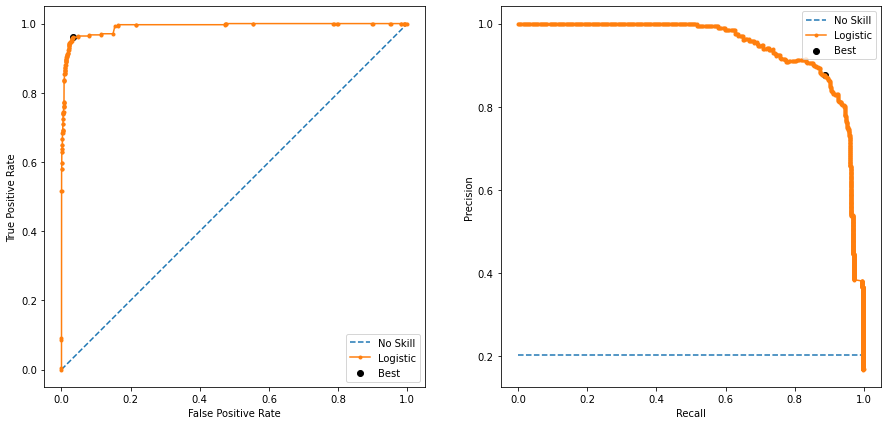

In [337]:
rfclf = SVC(kernel='linear', C=1, class_weight={0: 0.1, 1: 0.9}, random_state=42, probability=True)
rfclf.fit(tfidfObject_train, y_train)
yhat = rfclf.predict_proba(tfidfObject_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

rcParams['figure.figsize'] = 15, 7
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 2
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f-measure
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f-measure
ix = np.argmax(fscore)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# show the plot
plt.show()


In [339]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

***
Prediction of probability for SVC 
***

In [341]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y_train, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.475, F-measure=0.88312


***
### Using SVMSMOTE (oversampling the minority) with class weights in SVC
***

In [314]:
# define sampling
sme = SVMSMOTE(random_state=42)
X_train_smoteeen, y_train_smoteen = sme.fit_resample(tfidfObject_train, y_train)

# define model
rfclf = SVC(kernel='linear', C=2, class_weight={0: 0.1, 1: 0.9}, random_state=42)
rfclf.fit(X_train_smoteeen, y_train_smoteen)

# result train
y_pred_train = rfclf.predict(X_train_smoteeen)
print('TRAIN RESULTS -> \n', classification_report(y_train_smoteen, y_pred_train))

# result test
y_pred_test = rfclf.predict(tfidfObject_test)
print('\n\nTEST RESULTS -> \n', classification_report(y_test, y_pred_test))


TRAIN RESULTS -> 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      3194
           1       0.83      1.00      0.91      3194

    accuracy                           0.90      6388
   macro avg       0.91      0.90      0.89      6388
weighted avg       0.91      0.90      0.89      6388



TEST RESULTS -> 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1369
           1       0.23      0.80      0.36       131

    accuracy                           0.75      1500
   macro avg       0.60      0.77      0.60      1500
weighted avg       0.91      0.75      0.80      1500



***
### Using SVMSMOTE (oversampling the minority) with class weights in SVC and RandomUnderSampling for Majority
***

In [315]:
# define model
model = SVC(kernel='linear', C=2, class_weight={0: 0.1, 1: 0.9}, random_state=42)
# define pipeline
over = SVMSMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under), ('m', model)]
pipeline_SM_RU = Pipeline(steps=steps)

fit_pipe = pipeline_SM_RU.fit(tfidfObject_train, y_train)

y_pred = fit_pipe.predict(tfidfObject_train)
print('TRAIN RESULTS -> \n', classification_report(y_train, y_pred))


y_pred = fit_pipe.predict(tfidfObject_test)
print('\n\nTEST RESULTS -> \n', classification_report(y_test, y_pred))


TRAIN RESULTS -> 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      3194
           1       0.31      1.00      0.48       306

    accuracy                           0.81      3500
   macro avg       0.66      0.89      0.68      3500
weighted avg       0.94      0.81      0.85      3500



TEST RESULTS -> 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1369
           1       0.23      0.80      0.36       131

    accuracy                           0.75      1500
   macro avg       0.60      0.77      0.60      1500
weighted avg       0.91      0.75      0.80      1500



***
### Picking mode with SVMSMOTE and RandomUndersampling with class weights for grid search
***

In [316]:
params = {'m__kernel': ['linear', 'rbf'], 
          'm__C' :[1,2,3,4,5,6,7,8,9],
          'm__class_weight' : [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}]}

cv = StratifiedKFold(random_state=42, shuffle=True)

search = GridSearchCV(pipeline_SM_RU, param_grid=params, cv=cv, scoring=['recall', 'f1'], refit='recall', n_jobs=-1)
search.fit(tfidfObject_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('o', SVMSMOTE(random_state=42)),
                                       ('u', RandomUnderSampler()),
                                       ('m',
                                        SVC(C=2, class_weight={0: 0.1, 1: 0.9},
                                            kernel='linear',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'m__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'm__class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                             {0: 0.3, 1: 0.7}],
                         'm__kernel': ['linear', 'rbf']},
             refit='recall', scoring=['recall', 'f1'])

In [317]:
y_pred = search.best_estimator_.steps[2][1].predict(tfidfObject_train)
print('TRAIN RESULTS -> : \n', classification_report(y_train, y_pred))


y_pred = search.best_estimator_.steps[2][1].predict(tfidfObject_test)
print('TEST RESULTS -> :\n', classification_report(y_test, y_pred))


print('BEST PARAMS: -> \n', search.best_params_)

TRAIN RESULTS -> : 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      3194
           1       0.20      1.00      0.34       306

    accuracy                           0.66      3500
   macro avg       0.60      0.81      0.55      3500
weighted avg       0.93      0.66      0.73      3500

TEST RESULTS -> :
               precision    recall  f1-score   support

           0       0.98      0.60      0.75      1369
           1       0.17      0.87      0.29       131

    accuracy                           0.62      1500
   macro avg       0.58      0.74      0.52      1500
weighted avg       0.91      0.62      0.71      1500

BEST PARAMS: -> 
 {'m__C': 1, 'm__class_weight': {0: 0.1, 1: 0.9}, 'm__kernel': 'linear'}


***
### SMOTE and Tomek Links Undersampling
***

In [346]:
# define model
model = SVC(kernel='linear', C=500, class_weight={0: 0.1, 1: 0.9}, random_state=42)
# define sampling
over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

steps = [('ou', over_under), ('m', model)]
pipeline_SM_RU = Pipeline(steps=steps)

params = {'m__kernel': ['linear', 'rbf'], 
          'm__C' :[1,2,3,4,5,6,7,8,9],
          'm__class_weight' : [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}]}

cv = StratifiedKFold(random_state=42, shuffle=True)

search = GridSearchCV(pipeline_SM_RU, param_grid=params, cv=cv, scoring=['recall', 'f1'], refit='recall', n_jobs=-1)
search.fit(tfidfObject_train, y_train)

In [345]:
y_pred = search.best_estimator_.steps[1][1].predict(tfidfObject_train)
print('TRAIN RESULTS -> : \n', classification_report(y_train, y_pred))


y_pred = search.best_estimator_.steps[1][1].predict(tfidfObject_test)
print('TEST RESULTS -> :\n', classification_report(y_test, y_pred))


print('BEST PARAMS: -> \n', search.best_params_)

AttributeError: 'RandomUnderSampler' object has no attribute 'predict'

***
###  SMOTE and Edited Nearest Neighbors Undersampling
***

In [ ]:
# define model
model = SVC(kernel='linear', C=1, class_weight={0: 0.1, 1: 0.9}, random_state=42)
# define sampling
resample = SMOTEENN()

steps = [('ou', over_under), ('m', model)]
pipeline_SM_RU = Pipeline(steps=steps)

params = {'m__kernel': ['linear', 'rbf'], 
          'm__C' :[1,2,3,4,5,6,7,8,9],
          'm__class_weight' : [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}]}

cv = StratifiedKFold(random_state=42, shuffle=True)

search = GridSearchCV(pipeline_SM_RU, param_grid=params, cv=cv, scoring=['recall', 'f1'], refit='recall', n_jobs=-1)
search.fit(tfidfObject_train, y_train)

In [ ]:
y_pred = search.best_estimator_.steps[2][1].predict(tfidfObject_train)
print('TRAIN RESULTS -> : \n', classification_report(y_train, y_pred))


y_pred = search.best_estimator_.steps[2][1].predict(tfidfObject_test)
print('TEST RESULTS -> :\n', classification_report(y_test, y_pred))


print('BEST PARAMS: -> \n', search.best_params_)